# I. Algorithm

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as mpatches

In [102]:
def build_adj(data):
    '''
    Given a data matrix that contains the edges that connect vertices, this function builds the adjacency matrix that connects edges, this is for undirected graphs
    '''
    vertices = np.max(data) # Max Vertex Number
    adj = np.zeros((vertices+1, vertices+1)) # Initializing adjacency matrix
    for i in range(0,len(data)):
        adj[int(data[i,0]),int(data[i,1])] = 1
        adj[int(data[i,1]),int(data[i,0])] = 1
    return adj  

def label_propagation(adj, iteration_max = 200):
    '''
    Given an adjacency matrix, assigns labels to each vertex using the label propagation algorithm
    '''
    vertices = len(adj)  # number of vertices
    labels = np.arange(vertices)  # initialize each vertex's label to its own index
    iterations = 0 # Iterations counter

    while True:
        
        updated = False  # flag to check if any label changed

        for i in range(vertices):
            # Find neighbors
            neighbors = np.where(adj[i] == 1)[0] 
            if len(neighbors) == 0:
                continue  # if no neighbors, skip

            neighbor_labels = labels[neighbors]

            # Find most common neighbor label (randomly breaking ties)
            unique_labels, counts = np.unique(neighbor_labels, return_counts=True)
            max_count_labels = unique_labels[counts == counts.max()]
            most_common_label = np.random.choice(max_count_labels)

            # Update label if it changes
            if labels[i] != most_common_label:
                labels[i] = most_common_label
                updated = True

        if not updated or iterations > iteration_max:
            break  # if no label changed during full pass, algorithm is done

        iterations = iterations + 1 # Update iteration counter
    return labels

def plot_label_prop(adj, iteration_max):

    labels = label_propagation(adj, iteration_max)
    graph = nx.Graph(adj)

    # Find all unique cluster labels
    unique_clusters = np.unique(labels)

    # Create a color map
    cmap = plt.cm.Set3
    colors = cmap(np.linspace(0, 1, len(unique_clusters)))

    # Draw nodes
    plt.figure(figsize=(7,5))
    pos = nx.spring_layout(graph, seed=42)

    # Getting color list
    node_color_list = [colors[np.where(unique_clusters == label)[0][0]] for label in labels]

    nx.draw(
        graph,
        pos,
        node_color=node_color_list,
        with_labels=False,
        node_size=100,
        edge_color='gray'
    )

    plt.title(f'Graph Colored by Label Propagation After {iteration_max} Iterations')

    # Create legend
    patches = []
    for idx, cluster in enumerate(unique_clusters):
        patch = mpatches.Patch(color=colors[idx], label=f'Cluster {cluster}')
        patches.append(patch)

    plt.legend(handles=patches, loc='best', title='Clusters', fontsize='small')

    plt.show()

    return labels


# II. Application to Data Set

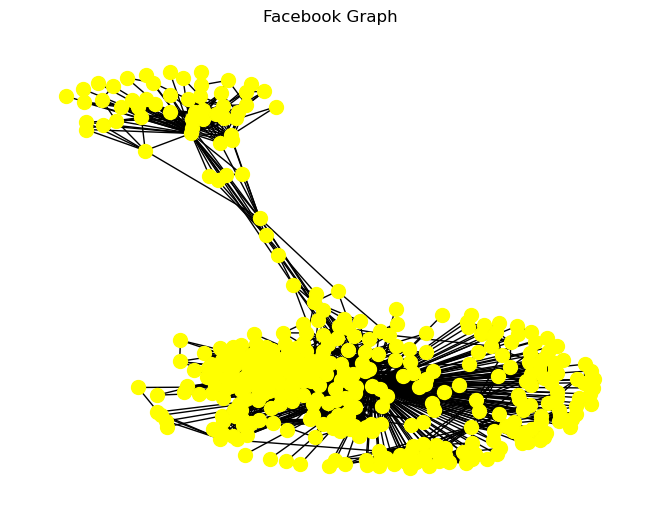

In [103]:
# Loading in Data Set of Facebook Data 
edges = pd.read_csv('facebook_combined.txt', sep=' ', header=None)
edges.columns = ['source', 'target']

# Restrict: Only vertices 0 to 400
edges_restricted = edges[(edges['source'] <= 400) & (edges['target'] <= 400)]

facebook_adj = build_adj(edges_restricted.to_numpy())

facebook = nx.Graph(facebook_adj)
nx.draw(facebook, with_labels = False, node_color= 'yellow', node_size = 100)
plt.title('Facebook Graph')
plt.show()


We can clearly see 2 main clusters of vertices, but let's try to investigate if there are any smaller clusters within our data.

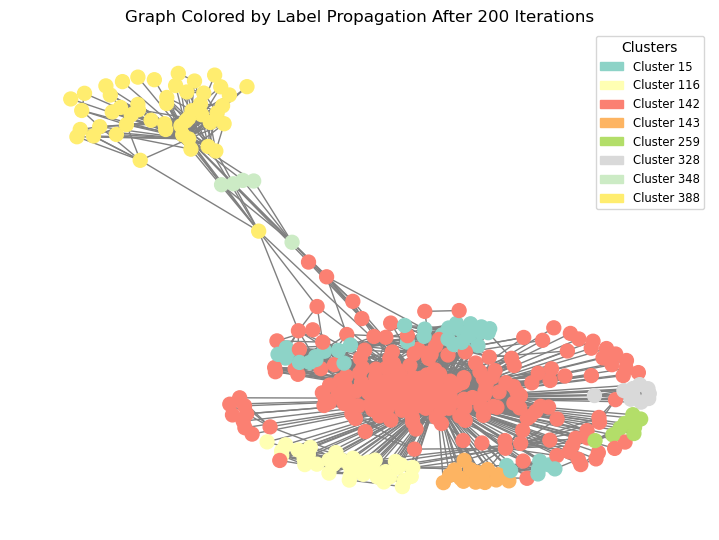

Number of clusters in our Facebook Network: 8
Cluster 15: 41 nodes
Cluster 116: 38 nodes
Cluster 142: 234 nodes
Cluster 143: 15 nodes
Cluster 259: 8 nodes
Cluster 328: 10 nodes
Cluster 348: 5 nodes
Cluster 388: 50 nodes


In [104]:
facebook_labels = plot_label_prop(facebook_adj, 200)

# Getting number of clusters
num_clusters = len(np.unique(facebook_labels))
print(f"Number of clusters in our Facebook Network: {num_clusters}")

# Getting size of each cluster

unique_labels, counts = np.unique(facebook_labels, return_counts=True)

for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} nodes")

We can see there are 8 clusters with one huge cluster and 7 smaller clusters. We can see that within the 2 large groups of data actually lie smaller clusters of data around the edges.